##### Nama : Muhammad Ridho Pratama
##### NIM  : 1306620013
##### Kelas: Fisika A

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

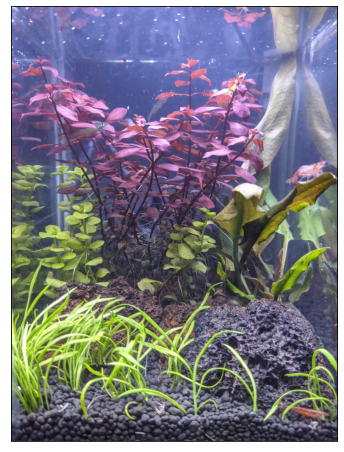

In [40]:
citra = cv2.imread('aquascape.png')
citra = cv2.cvtColor(citra, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 8));plt.imshow(citra)
plt.yticks([]); plt.xticks([]);plt.show()

In [41]:
print("Height : ", citra.shape[0])
print("Width : ", citra.shape[1])

print("\nPixel Value in 4000, 0 = ", citra[3999][0])
print("Tipe Data = ", type(citra))

Height :  4000
Width :  3000

Pixel Value in 4000, 0 =  [42 44 59]
Tipe Data =  <class 'numpy.ndarray'>


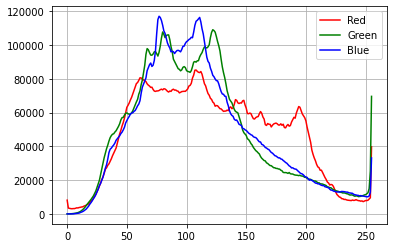

In [42]:
BGR = [cv2.calcHist([citra], [i], None, [256], [0, 256]) for i in range(3)]
R, G, B = BGR[2], BGR[1], BGR[0]
plt.plot(R, 'r', label='Red'), plt.plot(G, 'g', label='Green')
plt.plot(B, 'b', label = 'Blue')
plt.legend(), plt.grid()
plt.show()

##### 1. Transformasi Rotasi

##### Pemutaran citra adalah transformasi yang memutar setiap pikesel citra asal berdasarkan suatu titik pusat pemutaran. Matriks untuk pemutaran berupa:


\begin{equation*}
M = 
\begin{bmatrix}
\alpha & \beta & (1-\alpha).x_{pusat}-\beta.y_{pusat} \\
-\beta & \alpha & \beta.x_{pusat}+(1-\alpha).y_{pusat} 
\end{bmatrix}
\end{equation*}

##### Dalam hal ini
##### $\alpha = skala.cos\phi$
##### $\beta = skala.sin\phi$

##### Matriks M diperoleh dengan cv2.getRotationMatrix2D(pusat, sudut, skala)

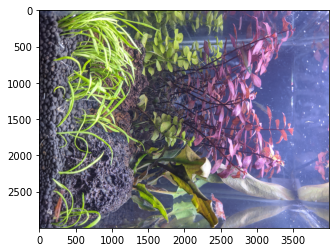

In [53]:
nrow, ncol = citra.shape[:2]
M = cv2.getRotationMatrix2D((ncol//2+(nrow//2-ncol//2),nrow//2), -90, 1)
result_rotasi = cv2.warpAffine(citra, M, (nrow, ncol))
plt.imshow(result_rotasi)


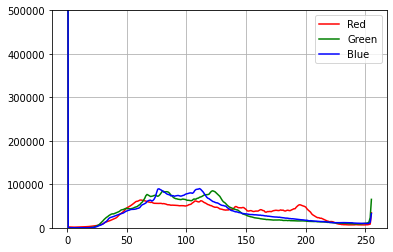

In [55]:
BGR_r = [cv2.calcHist([result], [i], None, [256], [0, 256]) for i in range(3)]
plt.plot(BGR_r[2], 'r', label='Red'), plt.plot(BGR_r[1], 'g', label='Green')
plt.plot(BGR_r[0], 'b', label = 'Blue')
plt.legend(), plt.grid(), plt.ylim([0, 0.5e6])
plt.show()

##### 2. Transformasi Affine

##### Transformasi affine adalah transformasi yang menggabungkan penyekalan, translasi, dan rotasi. Hal ini dapat menimbulkan pembengkokan. Matriks untuk transformasi affine diperoleh dengan cv2.getAffineTransfrom(titikAsal, titikTujuan). Dengan titik asal dan tujuan berisi titik segitiga.

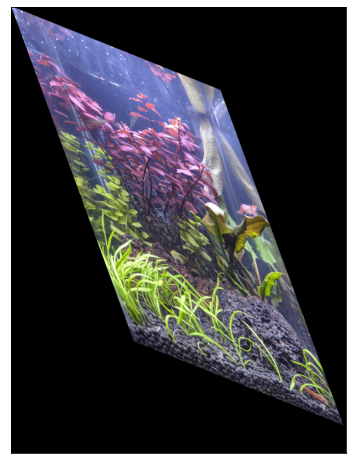

In [46]:
node1 = np.float32([[0, 0], [10, 50], [50, 50]])
node2 = np.float32([[0, 0], [20, 40], [45, 50]])

M = cv2.getAffineTransform(node1, node2)
resultAffine = cv2.warpAffine(citra, M, (ncol, nrow))
plt.figure(figsize = (6, 10))
plt.imshow(resultAffine); plt.xticks([]); plt.yticks([])
plt.show()


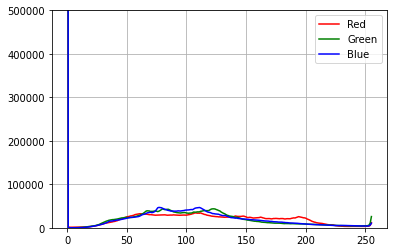

In [47]:
BGR_aff = [cv2.calcHist([resultAffine], [i], None, [256], [0, 256]) for i in range(3)]
plt.plot(BGR_aff[2], 'r', label='Red'), plt.plot(BGR_aff[1], 'g', label='Green')
plt.plot(BGR_aff[0], 'b', label = 'Blue')
plt.legend(), plt.grid(), plt.ylim([0, 0.5e6])
plt.show()

##### 3. Transformasi Pencerminan

##### Metode pencerminan dilakukan dalam 3 mode arah yakni arah horizontal, vertikal, dan gabungan keduanya. Dimana masing-masing mode arah memiliki matriksnya sendiri-sendiri seperti berikut:

##### Arah Horizontal

\begin{equation*}
M = 
\begin{bmatrix}
-1 & 0 & t_{x} \\
0 & 1 & 0
\end{bmatrix}
\end{equation*}

##### Arah Vertikal


\begin{equation*}
M = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & -1 & t_{y}
\end{bmatrix}
\end{equation*}

##### Arah Horizontal & Vertikal

\begin{equation*}
M = 
\begin{bmatrix}
-1 & 0 & t_{x} \\
0 & -1 & t_{y}
\end{bmatrix}
\end{equation*}

###### dengan t_{x} dan t_{y} berturut-turut adalah lebar citra dan tinggi citra.


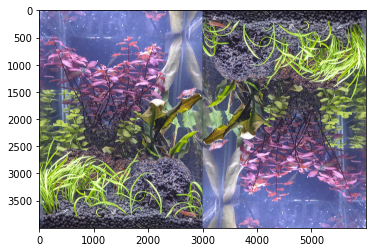

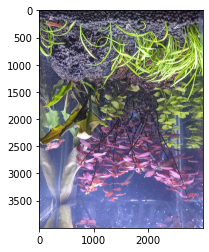

In [56]:
M_duaArah = np.float32([[-1, 0, ncol], [0, -1, nrow]])
result_reflektif = cv2.warpAffine(citra, M_duaArah, (ncol, nrow))
gabungan = np.hstack((citra, result_reflektif))
plt.imshow(gabungan)
plt.show()
plt.imshow(result_reflektif)
plt.show()

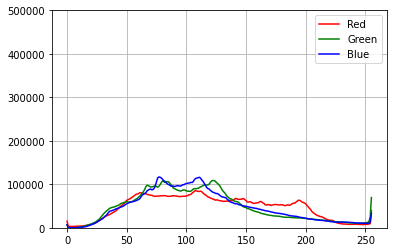

In [49]:
BGR_reflektif = [cv2.calcHist([result_reflektif], [i], None, [256], [0, 256]) for i in range(3)]
plt.plot(BGR_reflektif[2], 'r', label='Red'), plt.plot(BGR_reflektif[1], 'g', label='Green')
plt.plot(BGR_reflektif[0], 'b', label = 'Blue')
plt.legend(), plt.grid(), plt.ylim([0, 0.5e6])
plt.show()

##### 3. Transformasi Perspektif

##### Transformasi perspektif adalah transformasi citra untuk melihat suatu objek dari berbagai sudut pandang. Transformasi ini menggunakan 4 titik yang membentuk persegi sehingga akan menghasilkan objek yang dipilih dapat dilihat dengan beberapa sudut pandang. Untuk mendapatkan matriks transformasi jenis ini hanya perlu memanggil cv2.getPerspectiveTransform(titikawal, titikakhir), dimana titik awal dan akhir merupakan titik yang berbentuk bujur sangkar.

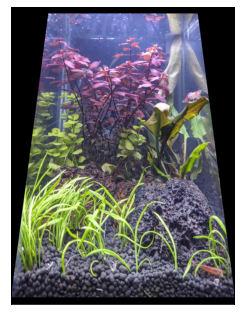

In [50]:
titikawal = np.float32([[0, 0], [2999, 0], [0, 3999], [2999, 3999]])
titikakhir = np.float32([[500, 100],[2500, 100], [0, 3909], [2999, 3909]])
M_perspektif = cv2.getPerspectiveTransform(titikawal, titikakhir)
result_perspektif = cv2.warpPerspective(citra, M_perspektif, (ncol, nrow))

plt.figure(figsize=(4, 12)); plt.imshow(result_perspektif); plt.xticks([])
plt.yticks([]); plt.show()

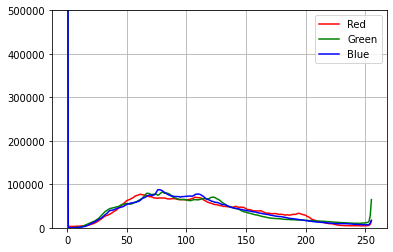

In [51]:
BGR_perspektif = [cv2.calcHist([result_perspektif], [i], None, [256], [0, 256]) for i in range(3)]
plt.plot(BGR_perspektif[2], 'r', label='Red'), plt.plot(BGR_perspektif[1], 'g', label='Green')
plt.plot(BGR_perspektif[0], 'b', label = 'Blue')
plt.legend(), plt.grid(), plt.ylim([0, 0.5e6])
plt.show()